In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [ ]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train /= 255.0
X_test /= 255.0

In [ ]:
# Set up Dense-only model
model = Sequential()
model.add(Dense(1024, input_shape=(1850,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1895424   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1799      
Total params: 2,159,623
Trainable params: 2,159,623
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32, verbose = 0)

322/322 [==============================] - 0s 68us/sample - loss: 0.8131 - accuracy: 0.8137


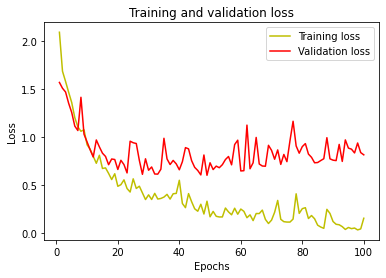

In [ ]:
loss, acc = model.evaluate(X_test, y_test)

def plot_loss_functions(model, history):
    weights = model.layers[0].get_weights()[0]
    biases = model.layers[0].get_weights()[1]

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
plot_loss_functions(model, history)

# Quite a bit overfit but we can work on that later, this model is quick and dirty

In [ ]:
# Convolutional

# Reshape the data
X_train_reshape = X_train.reshape(966, 50, 37, 1)
X_test_reshape = X_test.reshape(322, 50, 37, 1)

# Convolutional layers
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(50,37,1)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(32, (3,3), activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.25))

# Classifier layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(7, activation='softmax'))
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 35, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 17, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 7, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 7, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2464)             

In [ ]:
history_cnn = cnn.fit(X_train_reshape, y_train, epochs=100, batch_size=32, validation_data = (X_test_reshape, y_test), verbose=0)

322/322 [==============================] - 0s 77us/sample - loss: 0.3327 - accuracy: 0.9068


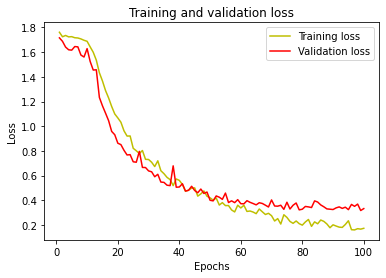

In [ ]:
loss, acc = cnn.evaluate(X_test_reshape, y_test)

plot_loss_functions(cnn, history_cnn)

# Still overfitting a little... at least accuracy is good